# Analysis of Zuber in Chicago

Zuber is a new ride-sharing company that's launching in Chicago. This project will help to find patterns in the available information and understand passenger preferences and the impact of external factors on riders.
I will find top of company name by trips and top of dropoff location by averenge trips. And will test hypothesis that the average duration of rides from Loop neighborhood to O'Hare International Airport changes on rainy Saturdays.

### Table of contents
[Step 1. Open the data file and study the general information](#Step-1.-Open-the-data-file-and-study-the-information.)
- [Conclusion Step 1](#Conclusion-Step-1)

[Step 2. Carry out exploratory data analysis](#Step-2.-Carry-out-exploratory-data-analysis)
- [Graph: taxi companies and number of rides](#Graph:-taxi-companies-and-number-of-rides)
- [Graph: top 10 neighborhoods by number of dropoffs](#Graph:-top-10-neighborhoods-by-number-of-dropoffs)
- [Conclusion Step 2](#Conclusion-Step-2)
 
[Step 3. Testing hypotheses](#Step-3.-Testing-hypotheses)
- [Conclusion Step 3](#Conclusion-Step-3)

[Step 4. General conclusion](#Step-4.-General-conclusion)

## Step 1. Open the data file and study the information.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='white', palette='Set2')

In [2]:
name_trips_df = pd.read_csv('project_sql_result_01.csv')
dropoff_average_df = pd.read_csv('project_sql_result_04.csv')
name_trips_df.head()
dropoff_average_df.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [3]:
name_trips_df.info()
print()
dropoff_average_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [4]:
name_trips_df.duplicated().value_counts()

False    64
dtype: int64

In [5]:
dropoff_average_df.duplicated().value_counts()

False    94
dtype: int64

### Conclusion Step 1
In first look data looks good. Haven't null data and all types is right and also don't have duplicate.

## Step 2. Carry out exploratory data analysis

#### Identify the top 10 neighborhoods in terms of drop-offs

In [6]:
dropoff_average_df.sort_values(by='average_trips',
                               ascending=False).head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


### Conclusion
The first neighborhoods is Loop with 10727 trips and this is not surprising, because this is the downtown. The last is Sheffield & DePaul with 1259 trips.

#### Graph: taxi companies and number of rides

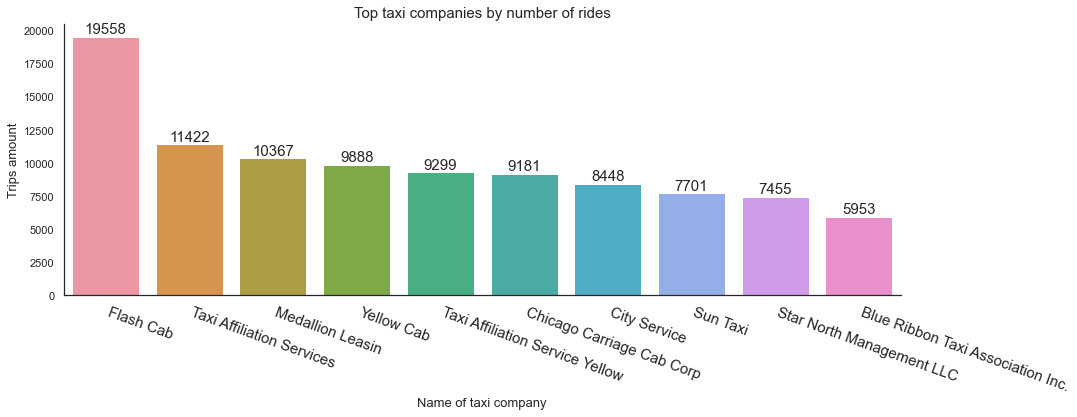

In [16]:
top10 = name_trips_df.sort_values(by='trips_amount',
                                  ascending=False).head(10)
plt.figure(figsize=(15, 5))
bar = sns.barplot(x='company_name', y='trips_amount', data=top10)
bar.set_xticklabels(labels=top10.company_name, rotation=-20, ha='left', size=15)
sns.despine()
plt.xlabel('Name of taxi company', size=13)
plt.ylabel('Trips amount', size=13)
plt.title('Top taxi companies by number of rides', size=15)
for p in bar.patches:
    bar.annotate(format(p.get_height(), '.0f'),
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha="center", va="center",
                 size=15,
                 xytext=(0, 7),
                 textcoords='offset points')

### Conclusion
The firt company is Flash Cab with 19558 trips. The last is Blue Ribbon Taxi Association Inc with 5953 trips. I think the difference in the amount of trips depends on the amount of cars in the company.

#### Graph: top 10 neighborhoods by number of dropoffs

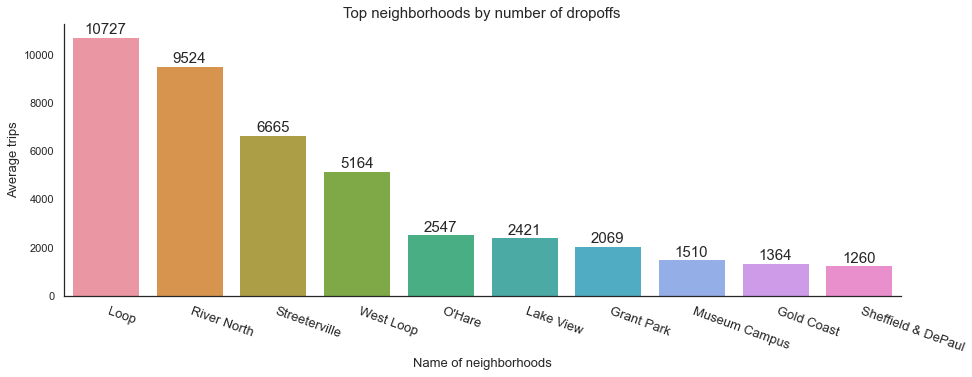

In [20]:
top10 = dropoff_average_df.sort_values(
    by='average_trips', ascending=False).head(10)
plt.figure(figsize=(15, 5))
bar = sns.barplot(x='dropoff_location_name', y='average_trips', data=top10)
bar.set_xticklabels(labels=top10.dropoff_location_name, rotation=-20, ha='left', size=13)
sns.despine()
plt.xlabel('Name of neighborhoods', size=13)
plt.ylabel('Average trips', size=13)
plt.title('Top neighborhoods by number of dropoffs', size=15)
for p in bar.patches:
    bar.annotate(format(p.get_height(), '.0f'),
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha="center", va="center",
                 size=15,
                 xytext=(0, 7),
                 textcoords='offset points')

### Conclusion
1072 on average trips to downtown (Loop neighborhood).

### Conclusion Step 2
The first neighborhood is Loop with 10727 trips and The firt company is Flash Cab with 19558 trips. I think it is becouse a lot of taxi cars of this company drives in Loop neighborhoods.

## Step 3. Testing hypotheses

#### We have hypothesis that the average duration of rides from Loop neighborhood to O'Hare International Airport changes on rainy Saturdays.

<b>Null hypothesis</b> - The weather not affects the average trip duration <br>
<b>Alternative hypothesis</b> - The average trip duration isn't the same in "good" weather or "bad" weather.

Open dataframe.

In [9]:
weather_df = pd.read_csv('project_sql_result_07.csv',
                         dtype={'weather_conditions': 'category',
                                'duration_seconds': 'int64'})
weather_df.head()
weather_df.info(memory_usage='deep')

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410
1,2017-11-25 14:00:00,Good,1920
2,2017-11-25 12:00:00,Good,1543
3,2017-11-04 10:00:00,Good,2512
4,2017-11-11 07:00:00,Good,1440


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   start_ts            1068 non-null   object  
 1   weather_conditions  1068 non-null   category
 2   duration_seconds    1068 non-null   int64   
dtypes: category(1), int64(1), object(1)
memory usage: 89.0 KB


Column stat_ts not in date type, but we don't need it for test hypothesis. duration_seconds was changed to int type.

Start testing

In [10]:
from scipy import stats as st
alpha = .05
lev_results = st.levene(weather_df.loc[weather_df.weather_conditions == 'Bad'].duration_seconds,
                        weather_df.loc[weather_df.weather_conditions == 'Good'].duration_seconds)
# test of conform to the variance criterion
print('p-value: ', lev_results.pvalue)

if (lev_results.pvalue < alpha):
    print("The data sets not conform to the variance criterion")
else:
    print("The data sets conform to the variance criterion")

stud_results = st.ttest_ind(weather_df.loc[weather_df.weather_conditions == 'Bad'].duration_seconds,
                            weather_df.loc[weather_df.weather_conditions == 'Good'].duration_seconds)
# test the hypothesis that the means of the two independent populations are equal

print('p-value: ', stud_results.pvalue)

if (stud_results.pvalue < alpha):
    print("Students test reject the null hypothesis")
else:
    print("Students test can't reject the null hypothesis")

p-value:  0.5332038671974493
The data sets conform to the variance criterion
p-value:  6.517970327099473e-12
Students test reject the null hypothesis


### Conclusion Step 3

Checked by Levene test the data sets conform to the variance criterion. After used Student's t-test and it reject the null hypothesis. That's mean that the average duration of rides from Loop neighborhood to O'Hare International Airport changes on bad weather Saturdays.

## Step 4. General conclusion

All data was seamless. There are many taxi companies in Chicago, but Flash Cab operates most of the trips. taxis are mainly used when traveling to the Loop area. The weather does not affect the average number of taxi rides from Loop to O'Hara Airport.